># **Name: Nader Mohamed Elhadedy**

## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
data = pd.read_csv("D:\student_scores.csv")

#### Explore your data

In [3]:
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [8]:
hours = data.iloc[:, 0]
scores = data.iloc[:, 1]
X = np.array(hours)
Y = np.array(scores)

#### Explore your data

In [9]:
print(f"Hours \n{hours}")
print()
print(f"Scores \n{scores}")

Hours 
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

Scores 
0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [10]:
print(f"X: {X}")
print()
print(F"Y: {Y}")

X: [2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]

Y: [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#### Plot the original data (scatter plot of X,y)

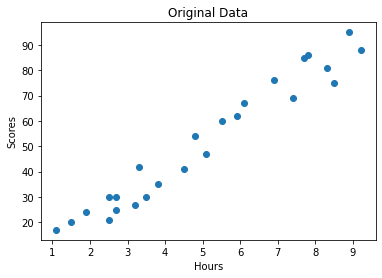

In [11]:
plt.scatter(X, Y)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Original Data")
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 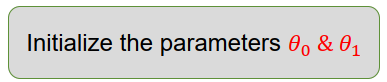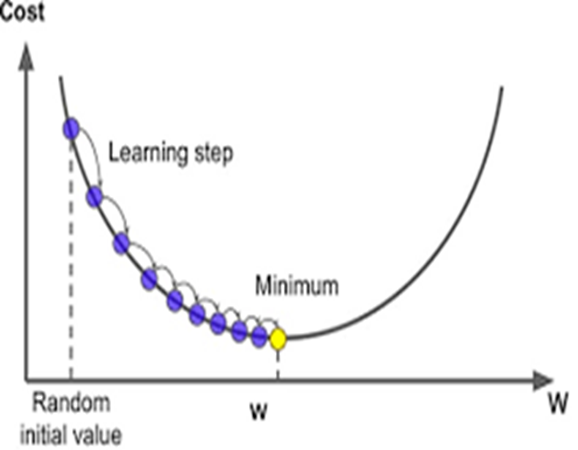

In [12]:
theta_0 = 10
theta_1 = 10
L = 0.01

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x
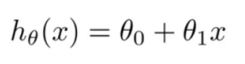
#### Note: you will need to iterate through all data points

In [13]:
Y_pred = theta_0 + theta_1 * X

print(Y_pred)

[ 35.  61.  42.  95.  45.  25. 102.  65.  93.  37.  87.  69.  55.  43.
  21.  99.  35.  29.  71.  84.  37.  58.  48.  79.  88.]


### Step3: Calculate Cost function 𝑱(theta_0,theta_1 )
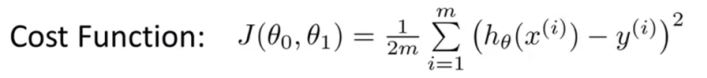

In [14]:
J = (1/(2*len(X))) * np.sum((Y_pred - Y)**2)

print(J)

51.92


### Step4: Calculate the gradient.


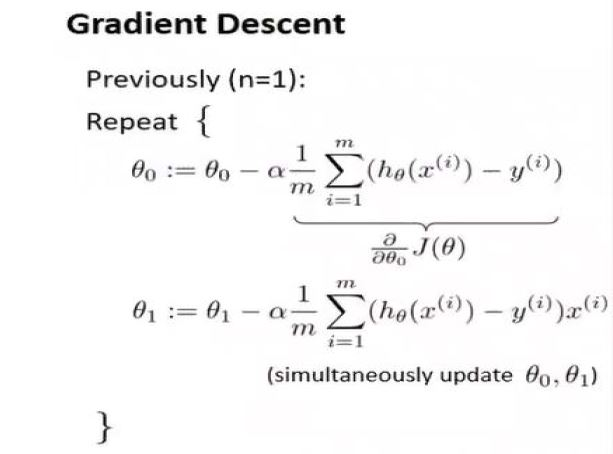

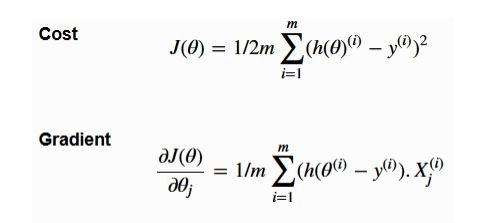





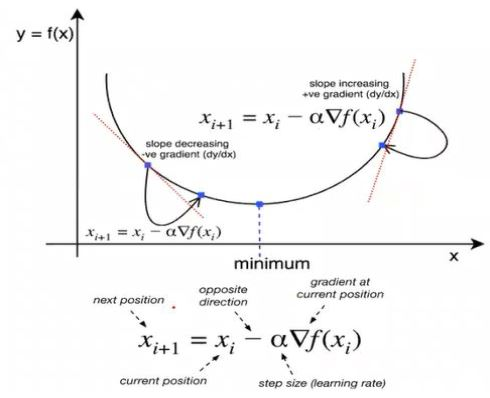

In [15]:
theta0_grd = (1/len(X)) * np.sum((Y_pred - Y))
theta1_grd = (1/len(X)) * np.sum((Y_pred - Y) * X)

print(f"Theta_0 Gradient: {theta0_grd}")
print(f"Theta_1 Gradient: {theta1_grd}")

Theta_0 Gradient: 8.64
Theta_1 Gradient: 44.675999999999995


### Step5: Update the parameters (simultaneously)
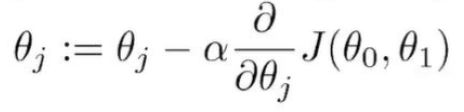

In [16]:
theta_0 = theta_0 - L * theta0_grd
theta_1 = theta_1 - L * theta1_grd

print(f"New Theta_0: {theta_0}")
print(f"New Theta_1: {theta_1}")

New Theta_0: 9.9136
New Theta_1: 9.55324


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.


8.JPG
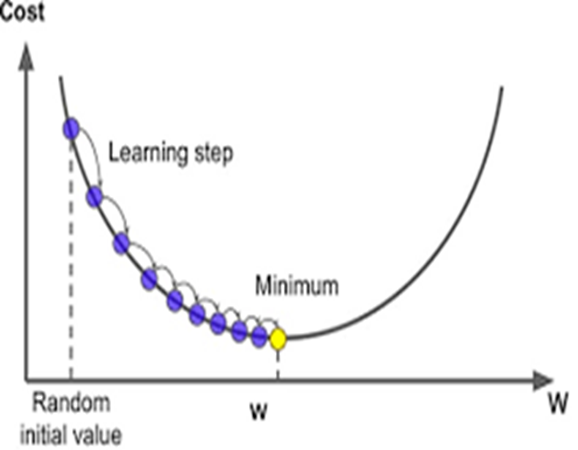

In [17]:
for i in range(1000):
    
    Y_pred = theta_0 + theta_1 * X
    theta0_grd = (1/len(X)) * np.sum((Y_pred - Y))
    theta1_grd = (1/len(X)) * np.sum((Y_pred - Y) * X)
    theta_0 = theta_0 - L * theta0_grd
    theta_1 = theta_1 - L * theta1_grd
    
print(f"Last Theta_0: {theta_0}")
print(f"Last Theta_1: {theta_1}")

Last Theta_0: 3.559359919957061
Last Theta_1: 9.602170438001316


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [18]:
Y_pred_final = theta_0 + theta_1 * X

print(f"Predicted values: \n {Y_pred_final}")

Predicted values: 
 [27.56478601 52.53042915 34.28630532 85.17780864 37.16695645 17.96261558
 91.89932795 56.37129733 83.25737456 29.4852201  77.49607229 60.2121655
 46.76912689 35.24652237 14.1217474  89.01867682 27.56478601 21.80348375
 62.13259959 74.61542116 29.4852201  49.64977802 40.04760758 69.81433594
 78.45628934]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

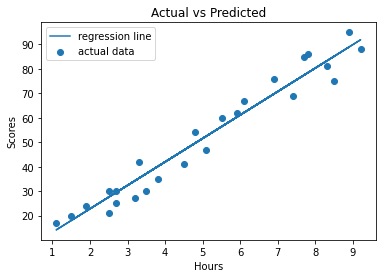

In [19]:
plt.scatter(X, Y, label="actual data")
plt.plot(X, Y_pred_final, label="regression line")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

#### Use R2 score to evaluate LR equation output
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [20]:
y_mean = np.mean(Y)
SStot = np.sum((Y - y_mean)**2)
SSres = np.sum((Y - Y_pred_final)**2)

R2 = 1 - (SSres / SStot)

print(f"R2: {R2}")
# R2 value is very close to 1, so it's a good fitting line

R2: 0.9525788150654281


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [21]:
theta_0 = 10
theta_1 = 10
L = 0.01

theta0_list = []
theta1_list = []

for i in range(1000):
    
    Y_pred = theta_0 + theta_1 * X
    theta0_grd = (1/len(X)) * np.sum((Y_pred - Y))
    theta1_grd = (1/len(X)) * np.sum((Y_pred - Y) * X)
    
    theta_0 = theta_0 - L * theta0_grd
    theta0_list.append(theta_0)
    
    theta_1 = theta_1 - L * theta1_grd
    theta1_list.append(theta_1)
    
theta0_list = np.array(theta0_list)
theta1_list = np.array(theta1_list)

Y_pred_vectors = X * theta1_list.reshape(len(theta1_list),1) + theta0_list.reshape(len(theta0_list),1)

Y_pred_vec = Y_pred_vectors[-1]

print(f"Predicted Values \n {Y_pred_vec}")

Predicted Values 
 [27.56601372 52.53079302 34.28730045 85.17704288 37.16785191 17.96417552
 91.89832961 56.3715283  83.25667524 29.48638136 77.49557232 60.21226357
 46.7696901  35.24748427 14.12344025 89.01777816 27.56601372 21.8049108
 62.13263121 74.61502086 29.48638136 49.65024156 40.04840337 69.81410177
 78.45575614]


#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

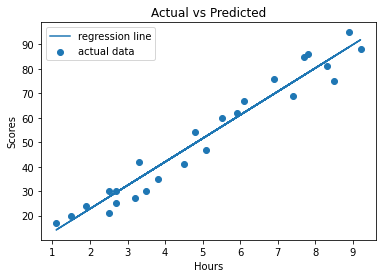

In [22]:
plt.scatter(X, Y, label="actual data")
plt.plot(X, Y_pred_vec, label="regression line")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [23]:
# another way
y_mean_again = np.sum(Y) / len(Y)
SStot_again = np.sum((Y - y_mean_again) * (Y - y_mean_again))
SSres_again = np.sum((Y - Y_pred_vec) * (Y - Y_pred_vec))

R2_again = 1 - (SSres_again / SStot_again)

print(f"R2: {R2_again}")

R2: 0.9525774000979744


## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [24]:
theta_0 = 10
theta_1 = 10
L = 0.01
loss_list = []

for i in range(1000):
    
    Y_pred_2 = theta_0 + theta_1 * X
    theta0_grd = (1/len(X)) * np.sum((Y_pred_2 - Y))
    theta1_grd = (1/len(X)) * np.sum((Y_pred_2 - Y) * X)
    theta_0 = theta_0 - L * theta0_grd
    theta_1 = theta_1 - L * theta1_grd
    J_val = (1/(2*len(X))) * np.sum((theta_0 + theta_1 * X - Y)**2)
    loss_list.append(J_val)
    
print(loss_list)

[34.52903604997859, 26.488706543377862, 22.765767299939963, 21.036282226757777, 20.22724965998607, 19.84324600966982, 19.65552547813594, 19.55847201984712, 19.503320727167218, 19.467555847216254, 19.44078131668314, 19.418196943236573, 19.397586245585334, 19.37792568710677, 19.358742534943637, 19.3398183724347, 19.321052205670977, 19.302397257421898, 19.283831783794817, 19.265345599779735, 19.246933857857975, 19.22859417547594, 19.210325308748008, 19.192126540080157, 19.173997395422884, 19.155937513720122, 19.13794658662945, 19.1200243306876, 19.102170474456972, 19.08438475258875, 19.066666903079746, 19.049016666003816, 19.031433782924022, 19.013917996619323, 18.99646905095621, 18.979086690827586, 18.96177066212243, 18.94452071170985, 18.927336587429753, 18.910218038086466, 18.89316481344394, 18.876176664221536, 18.85925334209003, 18.842394599667973, 18.825600190517964, 18.80886986914303, 18.792203390983037, 18.77560051241108, 18.759060990729985, 18.742584584168647, 18.726171051878637, 

### Plot loss vs. iterations

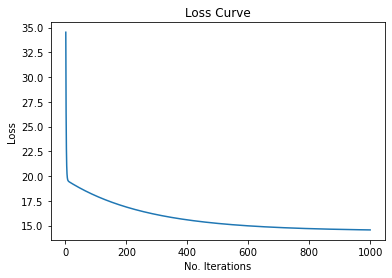

In [25]:
iters = np.arange(1,1001)
loss_list = np.array(loss_list)

plt.plot(iters, loss_list)
plt.xlabel("No. Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [26]:
data_2 = pd.read_csv("D:\california_housing_train.csv")

In [27]:
print(data_2)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                  15         5612            1283   
1        -114.47     34.40                  19         7650            1901   
2        -114.56     33.69                  17          720             174   
3        -114.57     33.64                  14         1501             337   
4        -114.57     33.57                  20         1454             326   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                  52         2217             394   
16996    -124.27     40.69                  36         2349             528   
16997    -124.30     41.84                  17         2677             531   
16998    -124.30     41.80                  19         2672             552   
16999    -124.35     40.54                  52         1820             300   

       population  households  median_income  media

In [28]:
data_2.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
5,-114.58,33.63,29,1387,236,671,239,3.3438,74000
6,-114.58,33.61,25,2907,680,1841,633,2.6768,82400
7,-114.59,34.83,41,812,168,375,158,1.7083,48500
8,-114.59,33.61,34,4789,1175,3134,1056,2.1782,58400
9,-114.60,34.83,46,1497,309,787,271,2.1908,48100


In [29]:
data_2.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16990,-124.22,41.73,28,3003,699,1530,653,1.7038,78300
16991,-124.23,41.75,11,3159,616,1343,479,2.4805,73200
16992,-124.23,40.81,52,1112,209,544,172,3.3462,50800
16993,-124.23,40.54,52,2694,453,1152,435,3.0806,106700
16994,-124.25,40.28,32,1430,419,434,187,1.9417,76100
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800
16999,-124.35,40.54,52,1820,300,806,270,3.0147,94600


In [30]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  int64  
 3   total_rooms         17000 non-null  int64  
 4   total_bedrooms      17000 non-null  int64  
 5   population          17000 non-null  int64  
 6   households          17000 non-null  int64  
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


In [31]:
data_2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [32]:
X0 = np.ones(len(data_2.iloc[:, 0]))
X1 = np.array(data_2.iloc[:, 0])
X2 = np.array(data_2.iloc[:, 1])
X3 = np.array(data_2.iloc[:, 2])
X4 = np.array(data_2.iloc[:, 3])
X5 = np.array(data_2.iloc[:, 4])
X6 = np.array(data_2.iloc[:, 5])
X7 = np.array(data_2.iloc[:, 6])
X8 = np.array(data_2.iloc[:, 7])

X1 = (X1 - np.mean(X1)) / np.std(X1)
X2 = (X2 - np.mean(X2)) / np.std(X2)
X3 = (X3 - np.mean(X3)) / np.std(X3)
X4 = (X4 - np.mean(X4)) / np.std(X4)
X5 = (X5 - np.mean(X5)) / np.std(X5)
X6 = (X6 - np.mean(X6)) / np.std(X6)
X7 = (X7 - np.mean(X7)) / np.std(X7)
X8 = (X8 - np.mean(X8)) / np.std(X8)

Y2 = np.array(data_2.iloc[:, 8])

In [33]:
print(X1)

[ 2.619365    2.53956878  2.4946834  ... -2.36291168 -2.36291168
 -2.387848  ]


In [34]:
print(Y2)

[ 66900  80100  85700 ... 103600  85800  94600]


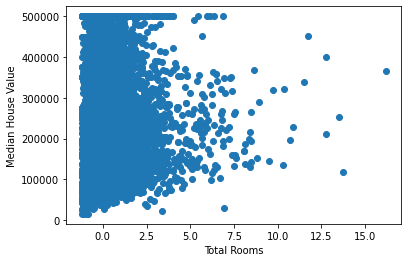

In [35]:
plt.scatter(X4, Y2)
plt.xlabel("Total Rooms")
plt.ylabel("Median House Value")
plt.show()

### Repeat your implementation but for more than one variable

In [36]:
theta_0, theta_1, theta_2, theta_3, theta_4, theta_5, theta_6, theta_7, theta_8 = 0,0,0,0,0,0,0,0,0
L = 0.1

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [37]:
loss_list_ML = []
lng = len(X1)

for i in range(10000):
    
    Y_pred_ML = theta_0*X0+theta_1*X1+theta_2*X2+theta_3*X3+theta_4*X4+theta_5*X5+theta_6*X6+theta_7*X7+theta_8*X8
    
    theta0_grd_ML = (1/lng) * np.sum((Y_pred_ML - Y2) * X0)
    theta1_grd_ML = (1/lng) * np.sum((Y_pred_ML - Y2) * X1)
    theta2_grd_ML = (1/lng) * np.sum((Y_pred_ML - Y2) * X2)
    theta3_grd_ML = (1/lng) * np.sum((Y_pred_ML - Y2) * X3)
    theta4_grd_ML = (1/lng) * np.sum((Y_pred_ML - Y2) * X4)
    theta5_grd_ML = (1/lng) * np.sum((Y_pred_ML - Y2) * X5)
    theta6_grd_ML = (1/lng) * np.sum((Y_pred_ML - Y2) * X6)
    theta7_grd_ML = (1/lng) * np.sum((Y_pred_ML - Y2) * X7)
    theta8_grd_ML = (1/lng) * np.sum((Y_pred_ML - Y2) * X8)
    
    theta_0 = theta_0 - L * theta0_grd_ML
    theta_1 = theta_1 - L * theta1_grd_ML
    theta_2 = theta_2 - L * theta2_grd_ML
    theta_3 = theta_3 - L * theta3_grd_ML
    theta_4 = theta_4 - L * theta4_grd_ML
    theta_5 = theta_5 - L * theta5_grd_ML
    theta_6 = theta_6 - L * theta6_grd_ML
    theta_7 = theta_7 - L * theta7_grd_ML
    theta_8 = theta_8 - L * theta8_grd_ML
    
    J_val_ML = (1/(2*lng)) * np.sum(((theta_0*X0+theta_1*X1+theta_2*X2+theta_3*X3+theta_4*X4+theta_5*X5+theta_6*X6+theta_7*X7+theta_8*X8) - Y2)**2)
    loss_list_ML.append(J_val_ML)
    
print(f"Predicted Values: \n {theta_0*X0+theta_1*X1+theta_2*X2+theta_3*X3+theta_4*X4+theta_5*X5+theta_6*X6+theta_7*X7+theta_8*X8}")

Predicted Values: 
 [  7128.0670017   73675.56544993 -31317.28394346 ... 100878.32813193
  63733.22119909 186850.92406703]


### Plot loss vs. iterations

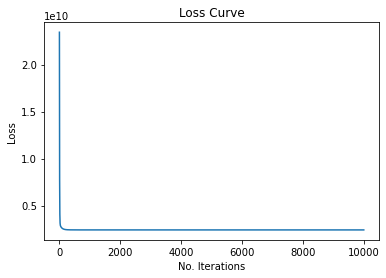

In [38]:
iters_ML = np.arange(1,10001)
loss_list_ML = np.array(loss_list_ML)

plt.plot(iters_ML, loss_list_ML)
plt.xlabel("No. Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

#### Use R2 score to evaluate LR equation output

In [39]:
y_mean_ML = np.mean(Y2)
Y_pred_final_ML = theta_0*X0+theta_1*X1+theta_2*X2+theta_3*X3+theta_4*X4+theta_5*X5+theta_6*X6+theta_7*X7+theta_8*X8
SStot_ML = np.sum((Y2 - y_mean_ML)**2)
SSres_ML = np.sum((Y2 - Y_pred_final_ML)**2)

R2_ML = 1 - (SSres_ML / SStot_ML)

print(f"R2_ML: {R2_ML}")

R2_ML: 0.6413378529502685


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

> **1) With splitting data (train, test)**

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [41]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [42]:
X_SKL = data.Hours
Y_SKL = data.Scores

In [43]:
LR_SKL = LinearRegression()

#### Train the model (fit the model to the training data)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_SKL, Y_SKL, test_size=0.2)

x_train= np.array(x_train).reshape(-1, 1)
y_train= np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

LR_SKL.fit(x_train, y_train)

print("Theta_0:",LR_SKL.intercept_)
print("Theta_1:",LR_SKL.coef_)

Theta_0: [1.56700285]
Theta_1: [[9.98587927]]


#### Predict y values using the trained model

In [45]:
predicted_values_SK = LR_SKL.predict(x_test)

print(f"Predicted values from model:\n {predicted_values_SK}")
print()
print(f"Actual values:\n {y_test}")

Predicted values from model:
 [[62.48086641]
 [84.44980081]
 [36.51758031]
 [93.43709216]
 [34.52040445]]

Actual values:
 18    67
8     81
4     30
6     88
13    42
Name: Scores, dtype: int64


#### Plot model output (fitted line) with the original data (scatter plot of X,y)

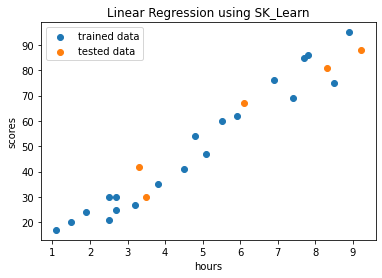

In [46]:
plt.scatter(x_train, y_train, label="trained data")
plt.scatter(x_test, y_test, label="tested data")
plt.xlabel("hours")
plt.ylabel("scores")
plt.title("Linear Regression using SK_Learn")
plt.legend()
plt.show()

#### Use R2 score to evaluate model output

In [47]:
LR_SKL.score(x_test, y_test)

0.9354945808179849

> **2) Without splitting data**

In [48]:
X_SKL_2 = data.Hours
Y_SKL_2 = data.Scores

In [49]:
LR_SKL_2 = LinearRegression()

In [50]:
X_SKL_2 = np.array(X_SKL_2).reshape(-1, 1)

LR_SKL_2.fit(X_SKL_2, Y_SKL_2)

print("Theta_0:",LR_SKL_2.intercept_)
print("Theta_1:",LR_SKL_2.coef_)

Theta_0: 2.48367340537321
Theta_1: [9.77580339]


In [51]:
predicted_values_SK_2 = LR_SKL_2.predict(X_SKL_2)

print(f"Predicted values from model:\n {predicted_values_SK_2}")

Predicted values from model:
 [26.92318188 52.3402707  33.76624426 85.57800223 36.69898527 17.14737849
 92.4210646  56.25059205 83.62284155 28.87834256 77.75735951 60.16091341
 46.47478866 34.74382459 13.23705714 89.48832358 26.92318188 21.05769985
 62.11607409 74.8246185  28.87834256 49.40752968 39.63172629 69.9367168
 78.73493985]


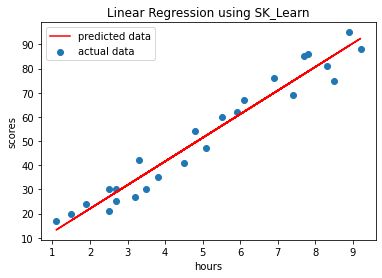

In [52]:
plt.scatter(X_SKL_2, Y_SKL_2, label="actual data")
plt.plot(X_SKL_2, predicted_values_SK_2, 'r', label="predicted data")
plt.xlabel("hours")
plt.ylabel("scores")
plt.title("Linear Regression using SK_Learn")
plt.legend()
plt.show()

In [53]:
LR_SKL_2.score(X_SKL_2, predicted_values_SK_2)

1.0

### Repeat for Mulivariate

In [54]:
data_2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [55]:
X_ML_SKL = data_2[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
Y_ML_SKL = data_2['median_house_value']

In [56]:
MR_SKL = LinearRegression()

In [57]:
MR_SKL.fit(X_ML_SKL, Y_ML_SKL)

LinearRegression()

In [58]:
predicted_values_ML_SKL = MR_SKL.predict(X_ML_SKL)

print(f"Predicted values \n {predicted_values_ML_SKL}")

Predicted values 
 [  7128.08452517  73675.60144226 -31317.28531192 ... 100878.3287267
  63733.22144716 186850.92450274]


In [59]:
MR_SKL.score(X_ML_SKL,predicted_values_ML_SKL)

1.0